# Preprocesado del dataset de airline

In [79]:
# %pip install kagglehub
import pandas as pd


dir_dataset = "../dataset/airline.csv"
air_df = pd.read_csv(dir_dataset)

In [80]:
air_df.info()
air_df.head()

print(f"There are {air_df.shape[0]} rows and {air_df.shape[1]} columns in the dataset.")
print(f"The dataset contains {air_df.isnull().sum().sum()} missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [81]:
# Check unique values and their count for each column
for column in air_df.columns:
    print(f"Feature: {column}")
    print(f"Possible values ({air_df[column].nunique()}): {air_df[column].unique()[:10]}")  # Limit to first 10 unique values
    print("-" * 50)


Feature: Passenger ID
Possible values (98619): ['ABVWIg' 'jkXXAX' 'CdUz2g' 'BRS38V' '9kvTLo' 'nMJKVh' '8IPFPE' 'pqixbY'
 'QNAs2R' '3jmudz']
--------------------------------------------------
Feature: First Name
Possible values (8437): ['Edithe' 'Elwood' 'Darby' 'Dominica' 'Bay' 'Lora' 'Rand' 'Perceval'
 'Aleda' 'Burlie']
--------------------------------------------------
Feature: Last Name
Possible values (41658): ['Leggis' 'Catt' 'Felgate' 'Pyle' 'Pencost' 'Durbann' 'Bram' 'Dallosso'
 'Pigram' 'Schustl']
--------------------------------------------------
Feature: Gender
Possible values (2): ['Female' 'Male']
--------------------------------------------------
Feature: Age
Possible values (90): [62 67 71 21 55 73 36 35 13 39]
--------------------------------------------------
Feature: Nationality
Possible values (240): ['Japan' 'Nicaragua' 'Russia' 'China' 'Brazil' 'Ivory Coast' 'Vietnam'
 'Palestinian Territory' 'Thailand' 'Tunisia']
--------------------------------------------------
F

In [87]:
# We gonna drop the unusful columns
# Convert the date into a number, good idea?????

air_df_cleaned = air_df.drop(columns=["Passenger ID", "First Name", "Last Name"])
air_df_cleaned["On Time"] = air_df_cleaned["Flight Status"].apply(lambda x: 1 if x == "On Time" else 0)
air_df_cleaned = air_df_cleaned.drop(columns=["Flight Status"])

# Drop the age of the passengers as it has an uniform distribution, as has nothing to do with the flight status
air_df_cleaned = air_df_cleaned.drop(columns=["Age"])

# Calculate the frequency distribution (mass probability function) for 'Pilot Name'
pilot_name_probabilities = air_df_cleaned['Pilot Name'].value_counts(normalize=False).unique()

value_counts = air_df_cleaned['Pilot Name'].value_counts(normalize=False)
frequency_distribution = value_counts.value_counts().sort_index()
for freq, count in frequency_distribution.items():
    print(f"Number of pilots that has {freq} appearances: {count}")

# I think the best option is to binary encode the pilots with 1 app to 0 and more than one app to 1
# Count the frequency of each pilot
pilot_frequencies = air_df_cleaned['Pilot Name'].value_counts()
# Map frequencies to binary values: 1 for pilots with 2 appearances, 0 for 1 appearance
air_df_cleaned['Pilot Name'] = air_df_cleaned['Pilot Name'].map(lambda x: 1 if pilot_frequencies[x] == 2 else 0)

# Binary Encoding for Gender
air_df_cleaned['Gender'] = air_df_cleaned['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Frequency Encoding for Selected Columns (TAKE CARE WITH THE INFO LEAKAGE THAT THIS CAN CAUSE)
columns_to_freq_encode = ['Nationality', 'Airport Name', 'Airport Country Code', 
                          'Country Name', 'Arrival Airport']

for column in columns_to_freq_encode:
    freq = air_df_cleaned[column].value_counts(normalize=True)  # Calculate normalized frequency
    air_df_cleaned[column] = air_df_cleaned[column].map(freq)

# One-Hot Encoding for Airport Continent and Continents
columns_to_one_hot_encode = ['Airport Continent', 'Continents']
air_df_cleaned = pd.get_dummies(air_df_cleaned, columns=columns_to_one_hot_encode, drop_first=True)

# Ensure 'Departure Date' is in datetime format
air_df_cleaned['Departure Date'] = pd.to_datetime(air_df_cleaned['Departure Date'], format="mixed")

# Encode the date as day-of-year (0 to 364)
air_df_cleaned['Departure Date'] = air_df_cleaned['Departure Date'].dt.dayofyear - 1  # Subtract 1 to start from 0


target_column = 'On Time'  
columns = [col for col in air_df_cleaned.columns if col != target_column]  
air_df_cleaned = air_df_cleaned[columns + [target_column]]  


# Convert True/False to 1/0
air_df_cleaned = air_df_cleaned.replace({True: 1, False: 0})


air_df_cleaned.head()




Number of pilots that has 1 appearances: 98591
Number of pilots that has 2 appearances: 14


/tmp/ipykernel_36045/3265806182.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  air_df_cleaned = air_df_cleaned.replace({True: 1, False: 0})


,Gender,Nationality,Airport Name,Airport Country Code,Country Name,Departure Date,Arrival Airport,Pilot Name,Airport Continent_AS,Airport Continent_EU,Airport Continent_NAM,Airport Continent_OC,Airport Continent_SAM,Continents_Asia,Continents_Europe,Continents_North America,Continents_Oceania,Continents_South America,On Time
0,0,0.018303,0.000112,0.224135,0.224135,178,0.000112,0,0,0,1,0,0,0,0,1,0,0,1
1,1,0.002058,0.000091,0.055000,0.055000,359,0.000091,0,0,0,1,0,0,0,0,1,0,0,1
2,1,0.057727,0.000152,0.014014,0.014014,17,0.000152,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0.185735,0.000071,0.055000,0.055000,258,0.000071,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0.185735,0.000112,0.224135,0.224135,55,0.000112,0,0,0,1,0,0,0,0,1,0,0,1


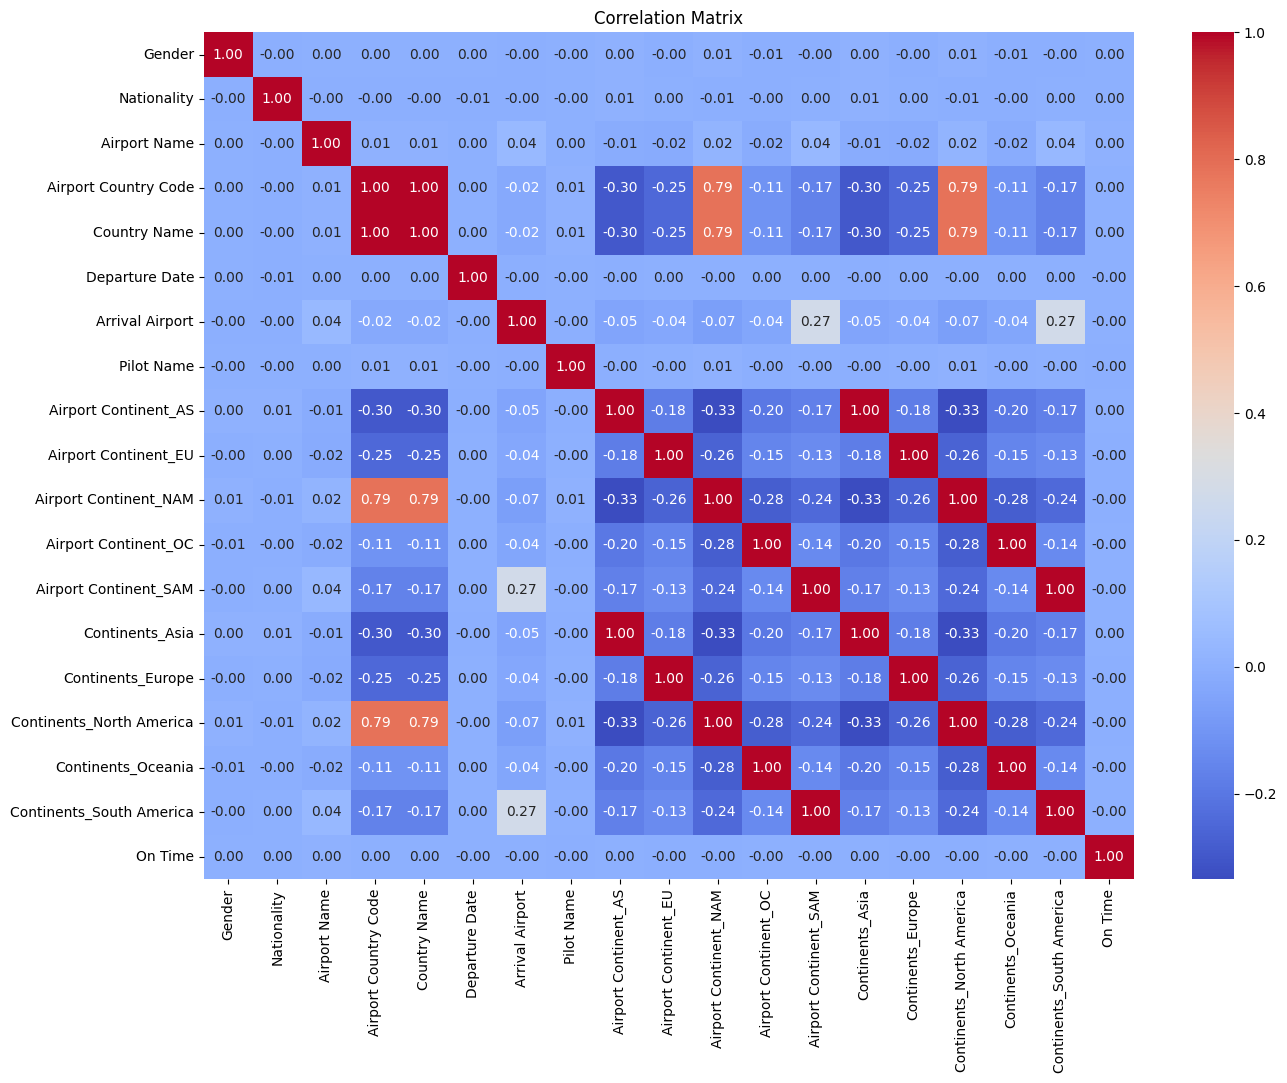

In [88]:
# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = air_df_cleaned.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()



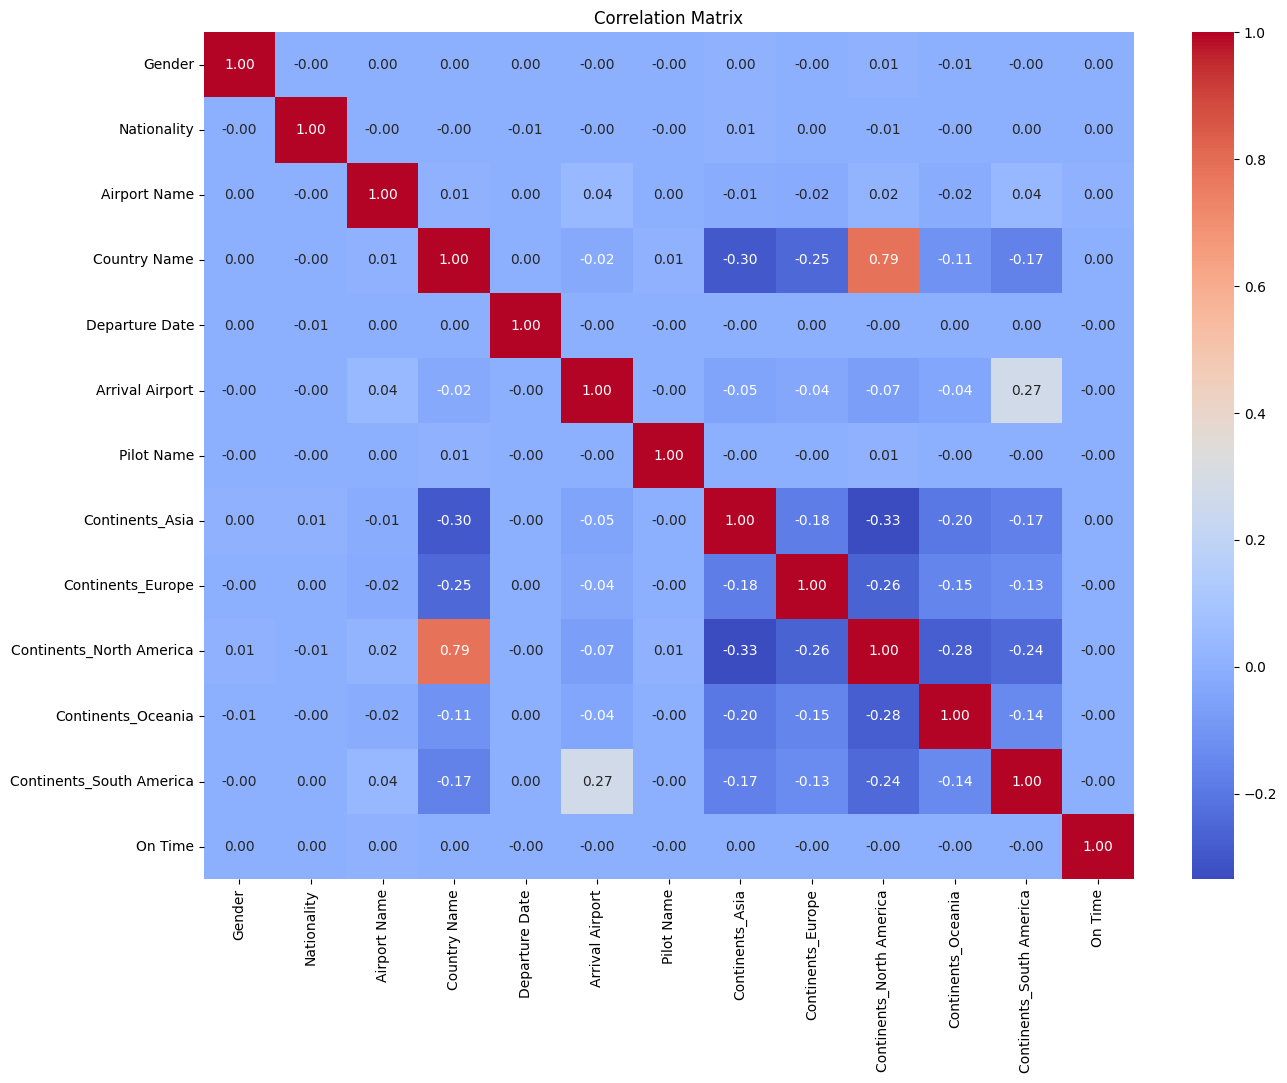

In [89]:
# It can be seen that airport continent_X and continent_X have a correlation of 1, i.e., they are the same feature. We gonna drop them.
columns_to_drop = [col for col in air_df_cleaned.columns if col.startswith("Airport Continent_")]
air_df_cleaned = air_df_cleaned.drop(columns=columns_to_drop)

# Same with airport country code and country name
air_df_cleaned = air_df_cleaned.drop(columns=['Airport Country Code'])

correlation_matrix = air_df_cleaned.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()



In [90]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare the dataset
X = air_df_cleaned.drop(columns=['On Time'])  # Features
y = air_df_cleaned['On Time']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Classification Metrics
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")



Logistic Regression Results:
              precision    recall  f1-score   support

           0     0.6642    1.0000    0.7982     13101
           1     0.0000    0.0000    0.0000      6623

    accuracy                         0.6642     19724
   macro avg     0.3321    0.5000    0.3991     19724
weighted avg     0.4412    0.6642    0.5302     19724

Accuracy: 0.6642

Random Forest Results:
              precision    recall  f1-score   support

           0     0.6649    0.8279    0.7375     13101
           1     0.3391    0.1747    0.2306      6623

    accuracy                         0.6085     19724
   macro avg     0.5020    0.5013    0.4840     19724
weighted avg     0.5555    0.6085    0.5673     19724

Accuracy: 0.6085


/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


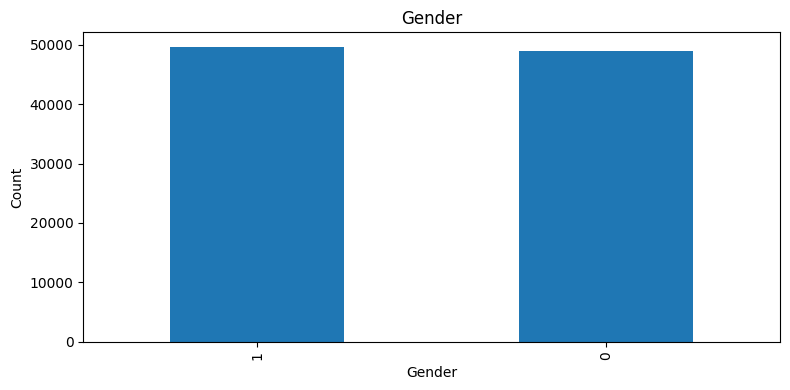

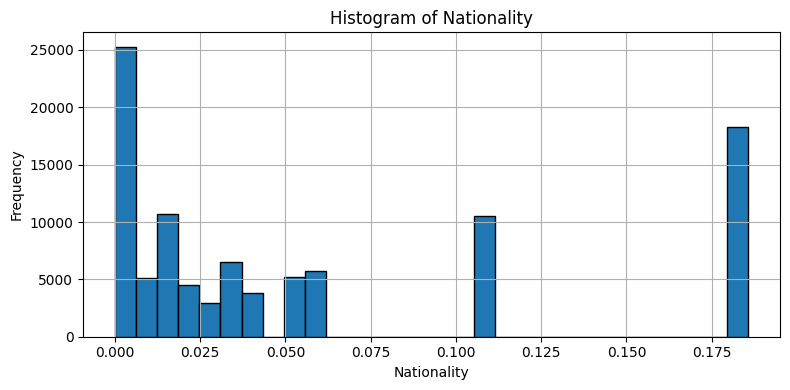

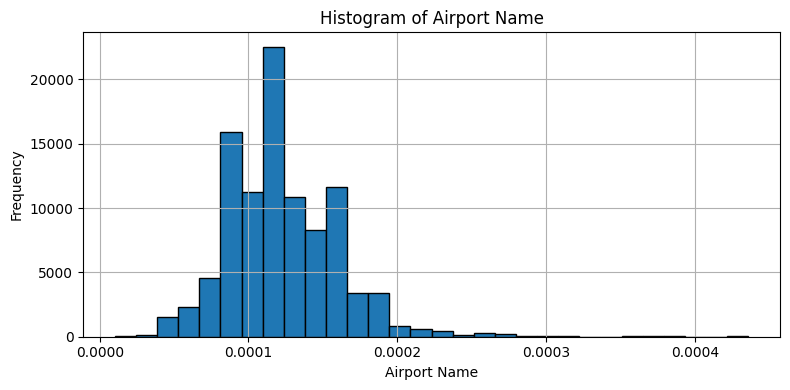

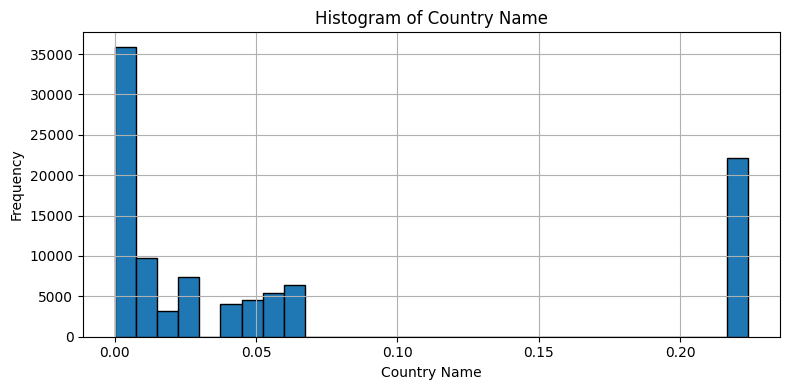

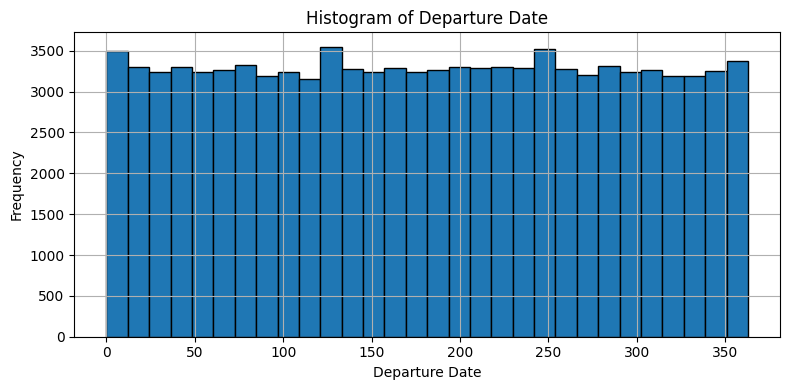

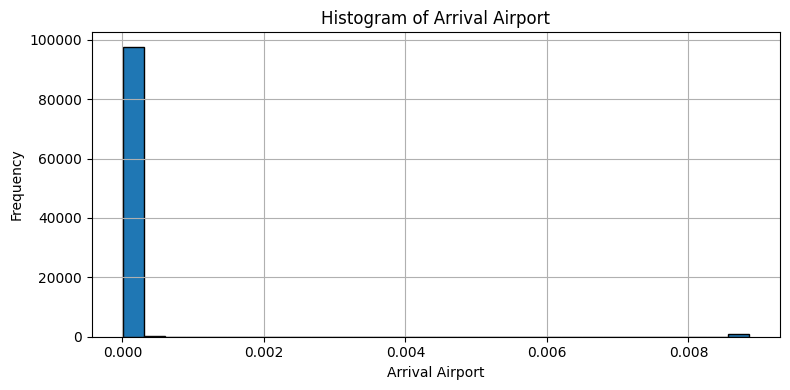

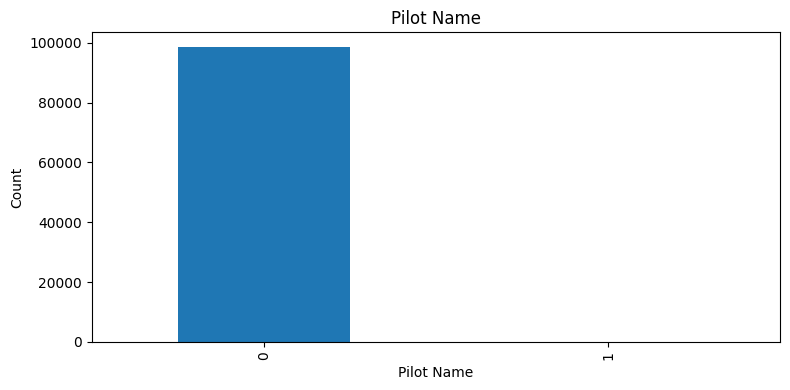

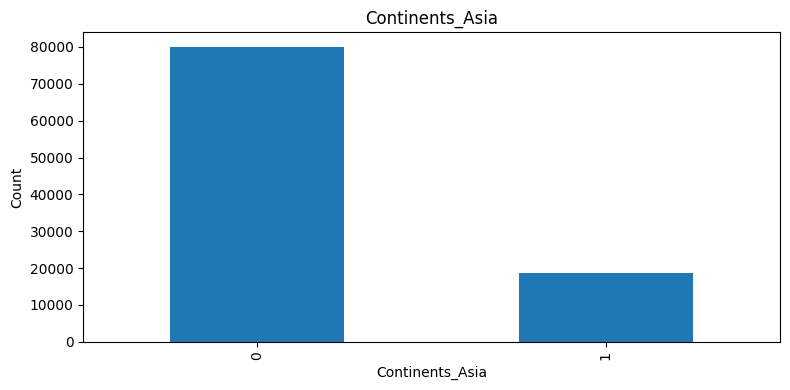

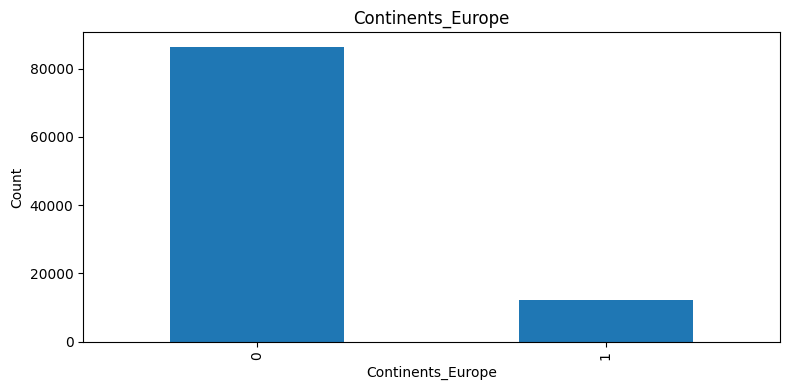

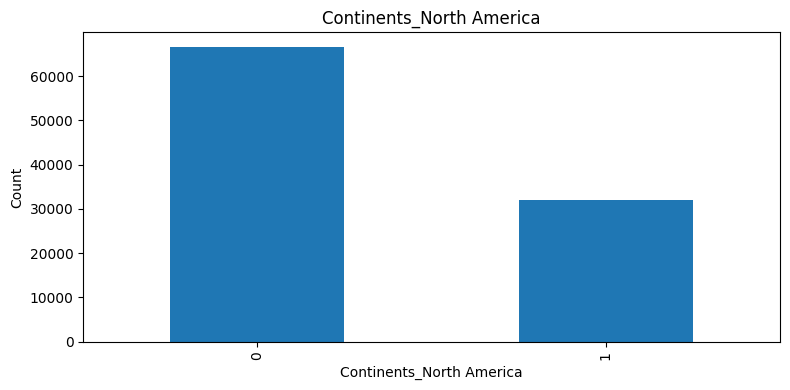

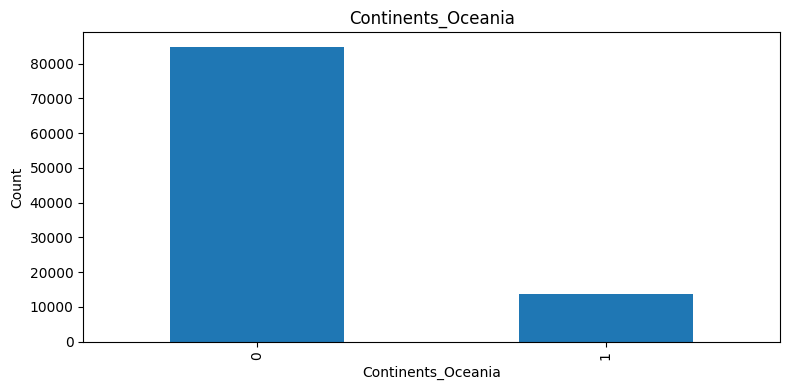

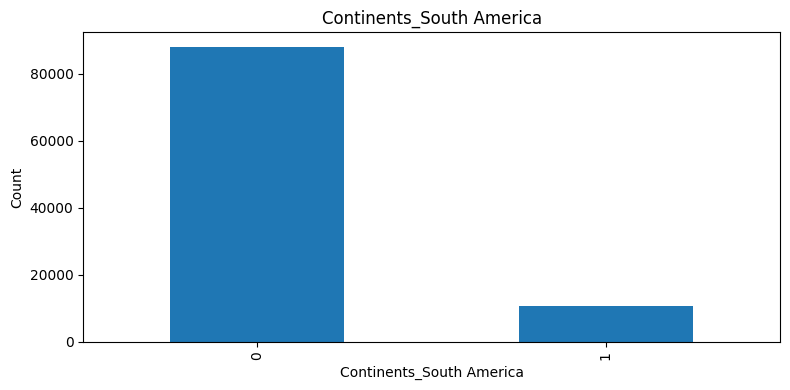

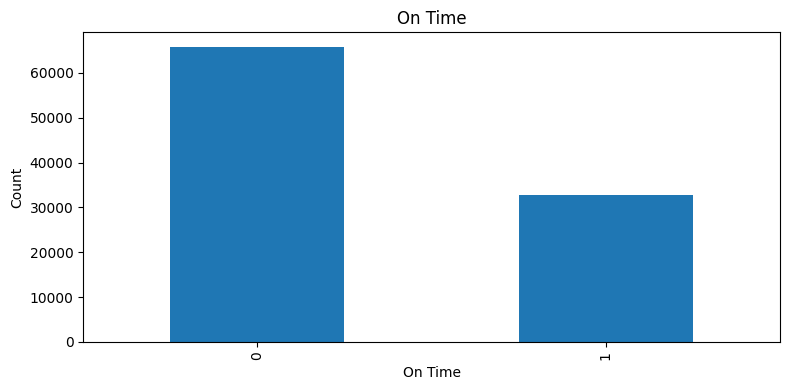

In [91]:
# Plot histograms for all columns
for column in air_df_cleaned.columns:
    plt.figure(figsize=(8, 4))
    if air_df_cleaned[column].nunique() <= 30:  # Categorical or few unique values
        air_df_cleaned[column].value_counts().plot(kind='bar', title=column)
        plt.xlabel(column)
        plt.ylabel('Count')
    else:  # Numerical or many unique values
        air_df_cleaned[column].hist(bins=30, edgecolor='black')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()